In [12]:
import torch, torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
import gzip, pickle, matplotlib.pyplot as plt

In [7]:
data_path = Path('data/mnist.pkl.gz')
with gzip.open(data_path, 'r') as f:
    ((x_train, y_train), (x_test, y_test), _) = pickle.load(f, encoding='latin') 
x_train, y_train, x_test, y_test = map(torch.tensor, (x_train, y_train, x_test, y_test))
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

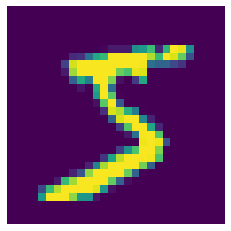

In [11]:
img = x_train[0]
img = img.view(28, 28)
plt.imshow(img);
plt.axis('off');

```python
# simple 2 layer nn

```

In [19]:
class Model(nn.Module):
    def __init__(self, n_in, n_h, n_o):
        super().__init__()
        self.layers = [nn.Linear(n_in, n_h), nn.ReLU(), nn.Linear(n_h, n_o)]
    
    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x

In [25]:
n_in = x_train.shape[1]
n_h = 50
n_o = 10

m = Model(n_in, n_h, n_o)
pred = m(x_train)
pred.shape

torch.Size([50000, 10])

```python
# cross entropy loss

```

In [28]:
def log_softmax(x):
    return (x.exp()/x.exp().sum(-1, keepdim=True)).log()

In [27]:
log_softmax(pred)

tensor([[-2.3409, -2.2223, -2.2488,  ..., -2.2479, -2.2836, -2.3605],
        [-2.2370, -2.3459, -2.3272,  ..., -2.1997, -2.2807, -2.4286],
        [-2.3528, -2.3656, -2.3088,  ..., -2.2208, -2.3294, -2.3476],
        ...,
        [-2.3864, -2.2722, -2.2351,  ..., -2.3467, -2.2651, -2.3086],
        [-2.4108, -2.2949, -2.2758,  ..., -2.3276, -2.3008, -2.2835],
        [-2.3530, -2.2503, -2.3203,  ..., -2.2206, -2.2502, -2.4000]],
       grad_fn=<LogBackward0>)

```python
# log product to sum trick

```

In [32]:
def log_softmax(x):
    return x - x.exp().sum(-1, keepdim=True).log()

In [33]:
log_softmax(pred)

tensor([[-2.3409, -2.2223, -2.2488,  ..., -2.2479, -2.2836, -2.3605],
        [-2.2370, -2.3459, -2.3272,  ..., -2.1997, -2.2807, -2.4286],
        [-2.3528, -2.3656, -2.3088,  ..., -2.2208, -2.3294, -2.3476],
        ...,
        [-2.3864, -2.2722, -2.2351,  ..., -2.3467, -2.2651, -2.3086],
        [-2.4108, -2.2949, -2.2758,  ..., -2.3276, -2.3008, -2.2835],
        [-2.3530, -2.2503, -2.3203,  ..., -2.2206, -2.2502, -2.4000]],
       grad_fn=<SubBackward0>)

```python
# log sum exp trick
* normalize with the maximum value, so avoid exploding big activations.

```

In [65]:
def logsumexp(x):
    m = x.max(-1)[-1]
    return m + (x-m[:,None]).exp().sum(-1).log()

In [66]:
def log_softmax(x):
    return x - logsumexp(x)[:,None]

In [67]:
log_softmax(pred)

tensor([[-2.3409, -2.2223, -2.2488,  ..., -2.2479, -2.2836, -2.3605],
        [-2.2370, -2.3459, -2.3272,  ..., -2.1997, -2.2807, -2.4286],
        [-2.3528, -2.3656, -2.3088,  ..., -2.2208, -2.3294, -2.3476],
        ...,
        [-2.3864, -2.2722, -2.2351,  ..., -2.3467, -2.2651, -2.3086],
        [-2.4108, -2.2949, -2.2758,  ..., -2.3276, -2.3008, -2.2835],
        [-2.3530, -2.2503, -2.3203,  ..., -2.2206, -2.2502, -2.4000]],
       grad_fn=<SubBackward0>)

```python
# pytorch logsumexp function

```

In [71]:
def log_softmax(x):
    return x - x.logsumexp(-1, keepdim=True)

In [72]:
log_softmax(pred)

tensor([[-2.3409, -2.2223, -2.2488,  ..., -2.2479, -2.2836, -2.3605],
        [-2.2370, -2.3459, -2.3272,  ..., -2.1997, -2.2807, -2.4286],
        [-2.3528, -2.3656, -2.3088,  ..., -2.2208, -2.3294, -2.3476],
        ...,
        [-2.3864, -2.2722, -2.2351,  ..., -2.3467, -2.2651, -2.3086],
        [-2.4108, -2.2949, -2.2758,  ..., -2.3276, -2.3008, -2.2835],
        [-2.3530, -2.2503, -2.3203,  ..., -2.2206, -2.2502, -2.4000]],
       grad_fn=<SubBackward0>)